# **1. Intitial Simulation with Dynamic Pricing**

In [6]:
class DynamicPricingEventBooking:
    def __init__(self, event_name, total_tickets, base_price, max_price):
        self.event_name = event_name
        self.total_tickets = total_tickets
        self.base_price = base_price
        self.max_price = max_price
        self.booked_tickets = 0
        self.booked_users = []
        self.waitlist = []

    def current_price(self):
        # Price increases linearly from base_price to max_price as demand increases
        demand_ratio = self.booked_tickets / self.total_tickets
        price = self.base_price + (self.max_price - self.base_price) * demand_ratio
        return round(price, 2)

    def book_ticket(self, user_id):
        price = self.current_price()
        if self.booked_tickets < self.total_tickets:
            self.booked_users.append(user_id)
            self.booked_tickets += 1
            return f"Ticket booked successfully for user {user_id} at price {price}."
        else:
            self.waitlist.append(user_id)
            return f"Tickets sold out. User {user_id} added to waitlist at position {len(self.waitlist)}."

    def cancel_ticket(self, user_id):
        if user_id in self.booked_users:
            self.booked_users.remove(user_id)
            self.booked_tickets -= 1
            if self.waitlist:
                next_user = self.waitlist.pop(0)
                self.booked_users.append(next_user)
                self.booked_tickets += 1
                return f"User {user_id} cancelled. User {next_user} moved from waitlist to booked."
            return f"User {user_id} cancelled their ticket."
        elif user_id in self.waitlist:
            self.waitlist.remove(user_id)
            return f"User {user_id} removed from waitlist."
        else:
            return f"User {user_id} has no booking or waitlist entry."

    def get_status(self):
        return {
            "event_name": self.event_name,
            "total_tickets": self.total_tickets,
            "booked_tickets": self.booked_tickets,
            "booked_users": self.booked_users,
            "waitlist": self.waitlist,
            "current_price": self.current_price()
        }

# Initialize booking system with dynamic pricing
booking_system = DynamicPricingEventBooking("AI and Computer Vision Event", 75, base_price=100, max_price=200)

# Step 1: Book 75 users and print booking status with price
print("--- Booking 75 users with dynamic pricing ---")
for user_id in range(1, 76):
    message = booking_system.book_ticket(user_id)
    if user_id % 15 == 0 or user_id == 1 or user_id == 75:  # Print some milestones
        print(message)

# Step 2: Waitlist next 35 users
print("--- Adding 35 users to waitlist ---")
for user_id in range(76, 111):
    message = booking_system.book_ticket(user_id)
    if user_id % 10 == 0 or user_id == 76 or user_id == 110:  # Print some milestones
        print(message)

# Print status after booking and waitlisting
status = booking_system.get_status()
print(f"\nStatus after booking and waitlisting:")
print(f"Booked Tickets: {status['booked_tickets']}")
print(f"Current Price: {status['current_price']}")
print(f"Waitlist Count: {len(status['waitlist'])}")

# Step 3: Simulate 10 cancellations and print updates
print("--- Simulating 10 cancellations ---")
for user_id in range(1, 11):
    message = booking_system.cancel_ticket(user_id)
    print(message)
    # Print current price after each cancellation
    print(f"Current price after cancellation {user_id}: {booking_system.current_price()}")

# Print final status
final_status = booking_system.get_status()
print(f"\nFinal Status:")
print(f"Booked Tickets: {final_status['booked_tickets']}")
print(f"Current Price: {final_status['current_price']}")
print(f"Waitlist Count: {len(final_status['waitlist'])}")


--- Booking 75 users with dynamic pricing ---
Ticket booked successfully for user 1 at price 100.0.
Ticket booked successfully for user 15 at price 118.67.
Ticket booked successfully for user 30 at price 138.67.
Ticket booked successfully for user 45 at price 158.67.
Ticket booked successfully for user 60 at price 178.67.
Ticket booked successfully for user 75 at price 198.67.
--- Adding 35 users to waitlist ---
Tickets sold out. User 76 added to waitlist at position 1.
Tickets sold out. User 80 added to waitlist at position 5.
Tickets sold out. User 90 added to waitlist at position 15.
Tickets sold out. User 100 added to waitlist at position 25.
Tickets sold out. User 110 added to waitlist at position 35.

Status after booking and waitlisting:
Booked Tickets: 75
Current Price: 200.0
Waitlist Count: 35
--- Simulating 10 cancellations ---
User 1 cancelled. User 76 moved from waitlist to booked.
Current price after cancellation 1: 200.0
User 2 cancelled. User 77 moved from waitlist to bo

#**Dashboard Analytics with visualization**

Starting ticket booking simulation with dynamic pricing strategy changes and status updates...

--- Pricing Strategy Changed: LINEAR ---
Reason: Linear pricing is chosen because demand is steady and there is no waitlist. This approach gradually increases price as tickets sell, balancing accessibility and revenue. It avoids discouraging early buyers with high prices and is effective when demand is moderate.

User 1 booked at price 100.0. | Booked: 1, Waitlist: 0, Strategy: linear
User 15 booked at price 118.67. | Booked: 15, Waitlist: 0, Strategy: linear
User 30 booked at price 138.67. | Booked: 30, Waitlist: 0, Strategy: linear

--- Pricing Strategy Changed: TIERED ---
Reason: Tiered pricing is chosen because demand is increasing and a waitlist is forming. This method sets clear price jumps at demand milestones, capturing more revenue as urgency grows. It is effective for events with surges in demand at certain booking stages.

User 45 booked at price 150.0. | Booked: 45, Waitlist: 0, 

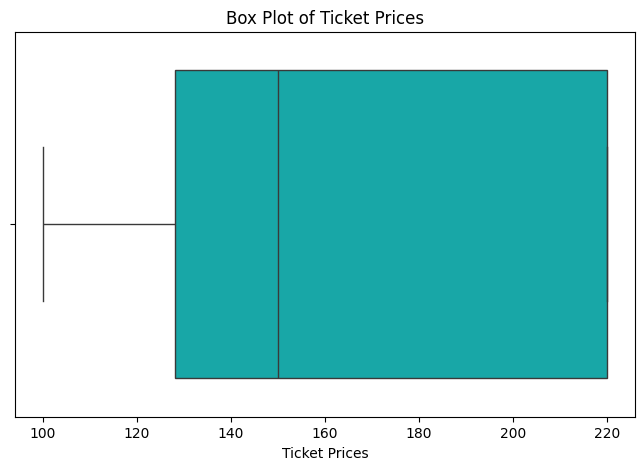

<ipython-input-10-43226755df5b>:182: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




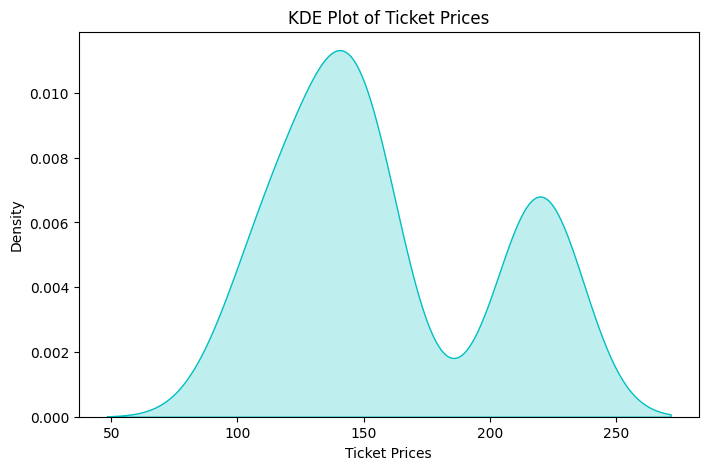

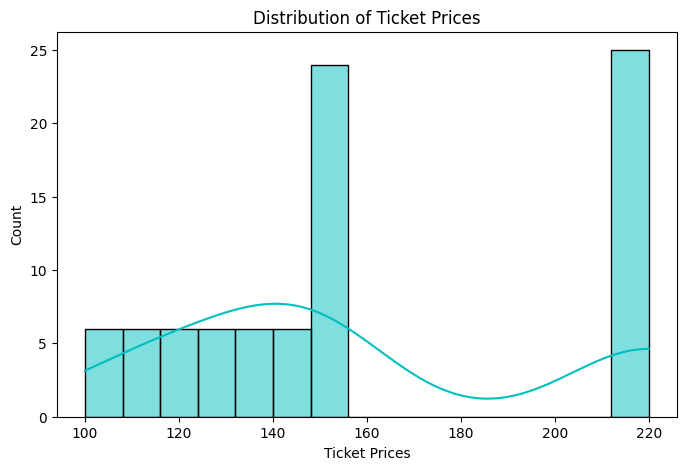

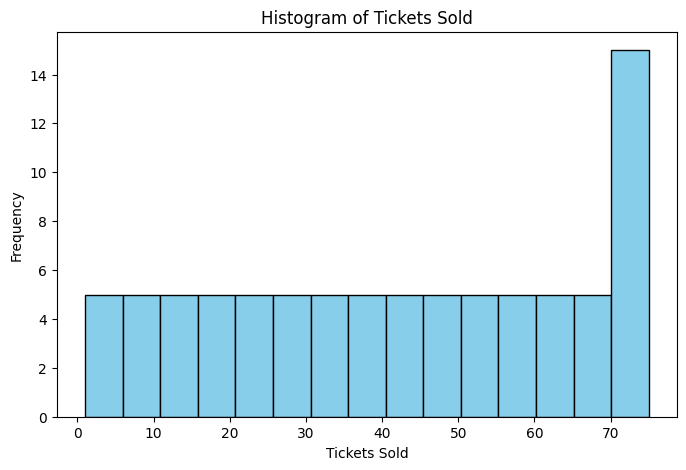

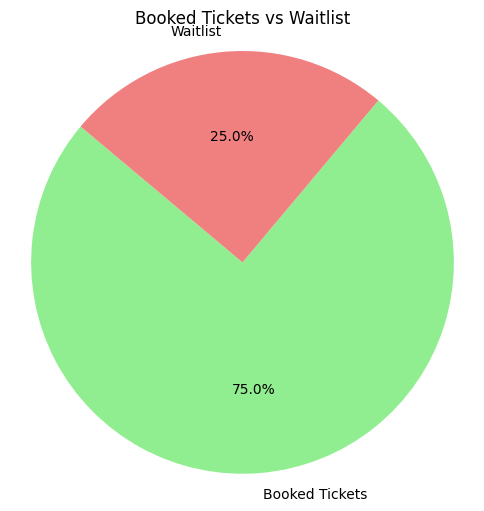

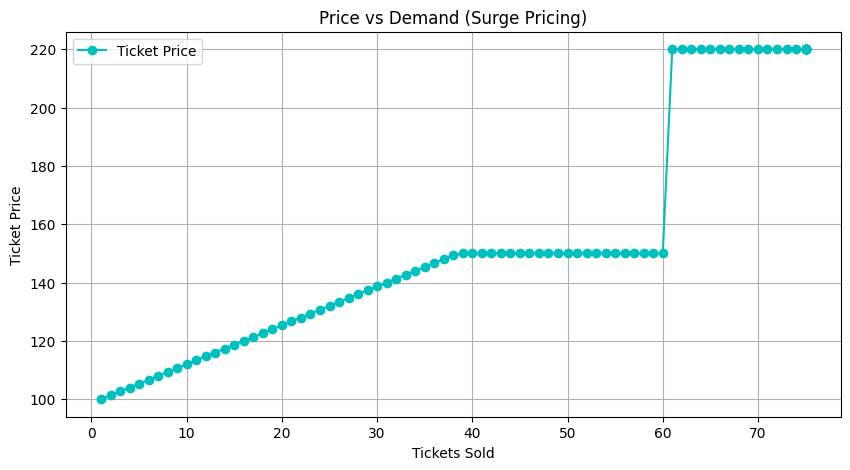

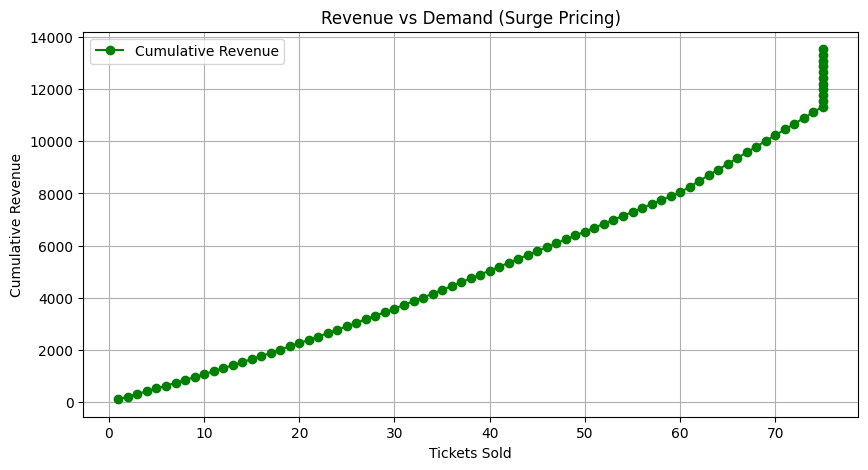

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def analyze_and_choose_strategy(sales_history, waitlist_count, total_tickets):
    """
    Decide which pricing strategy to use based on current sales and waitlist.
    Returns the strategy and the reason for choosing it.
    """
    sales_rate = sales_history[-1] / len(sales_history)
    sellout_ratio = sales_history[-1] / total_tickets

    if sellout_ratio < 0.5 and waitlist_count == 0:
        chosen = "linear"
        reason = (
            "Linear pricing is chosen because demand is steady and there is no waitlist. "
            "This approach gradually increases price as tickets sell, balancing accessibility and revenue. "
            "It avoids discouraging early buyers with high prices and is effective when demand is moderate."
        )
    elif 0.5 <= sellout_ratio < 0.8 or (waitlist_count > 0 and sellout_ratio < 0.8):
        chosen = "tiered"
        reason = (
            "Tiered pricing is chosen because demand is increasing and a waitlist is forming. "
            "This method sets clear price jumps at demand milestones, capturing more revenue as urgency grows. "
            "It is effective for events with surges in demand at certain booking stages."
        )
    else:
        chosen = "surge"
        reason = (
            "Surge pricing is chosen because tickets are nearly sold out or the waitlist is large. "
            "This maximizes profit by rapidly increasing prices when demand far exceeds supply. "
            "It is ideal for high-demand events where maximizing last-minute revenue is critical."
        )
    return chosen, reason

class DynamicPricingEventBooking:
    def __init__(self, event_name, total_tickets, base_price, max_price):
        self.event_name = event_name
        self.total_tickets = total_tickets
        self.base_price = base_price
        self.max_price = max_price
        self.booked_tickets = 0
        self.booked_users = []
        self.waitlist = []
        self.price_history = []
        self.sales_history = []
        self.revenue_history = []
        self.strategy = None
        self.strategy_reason = None

    def current_price(self):
        strat = self.strategy or "linear"
        if strat == "linear":
            demand_ratio = self.booked_tickets / self.total_tickets
            price = self.base_price + (self.max_price - self.base_price) * demand_ratio
        elif strat == "tiered":
            if self.booked_tickets < self.total_tickets * 0.5:
                price = self.base_price
            elif self.booked_tickets < self.total_tickets * 0.8:
                price = self.base_price + (self.max_price - self.base_price) * 0.5
            else:
                price = self.max_price
        elif strat == "surge":
            if self.booked_tickets < self.total_tickets * 0.8:
                price = self.base_price + (self.max_price - self.base_price) * (self.booked_tickets / (self.total_tickets * 0.8))
            else:
                price = self.max_price * 1.1
        else:
            price = self.base_price
        return round(price, 2)

    def book_ticket(self, user_id):
        price = self.current_price()
        if self.booked_tickets < self.total_tickets:
            self.booked_users.append(user_id)
            self.booked_tickets += 1
            self.price_history.append(price)
            self.sales_history.append(self.booked_tickets)
            self.revenue_history.append(price if len(self.revenue_history)==0 else self.revenue_history[-1]+price)
            return f"User {user_id} booked at price {price}."
        else:
            self.waitlist.append(user_id)
            return f"User {user_id} added to waitlist at position {len(self.waitlist)}."

    def cancel_ticket(self, user_id):
        if user_id in self.booked_users:
            self.booked_users.remove(user_id)
            self.booked_tickets -= 1
            if self.waitlist:
                next_user = self.waitlist.pop(0)
                self.booked_users.append(next_user)
                self.booked_tickets += 1
                price = self.current_price()
                self.price_history.append(price)
                self.sales_history.append(self.booked_tickets)
                self.revenue_history.append(self.revenue_history[-1]+price)
                return f"User {user_id} cancelled. User {next_user} promoted from waitlist at price {price}."
            return f"User {user_id} cancelled their ticket."
        elif user_id in self.waitlist:
            self.waitlist.remove(user_id)
            return f"User {user_id} removed from waitlist."
        else:
            return f"User {user_id} has no booking or waitlist entry."

    def choose_strategy(self):
        chosen, reason = analyze_and_choose_strategy(
            self.sales_history if self.sales_history else [0],
            len(self.waitlist),
            self.total_tickets
        )

        if chosen != self.strategy:
            print(f"\n--- Pricing Strategy Changed: {chosen.upper()} ---")
            print(f"Reason: {reason}\n")
        self.strategy = chosen
        self.strategy_reason = reason

    def print_strategy_reason(self):
        print(f"\nFinal Pricing Strategy: {self.strategy.capitalize()}")
        print(f"Reason: {self.strategy_reason}")

    def get_final_status(self):
        print(f"\nEvent: {self.event_name}")
        print(f"Total Tickets: {self.total_tickets}")
        print(f"Booked Tickets: {self.booked_tickets}")
        print(f"Waitlist Count: {len(self.waitlist)}")
        print(f"Final Ticket Price: {self.current_price()}")
        print(f"Total Revenue: {self.revenue_history[-1] if self.revenue_history else 0}")

# --- Simulation with Dynamic Strategy and Status Updates ---

booking_system = DynamicPricingEventBooking(
    event_name="AI and Computer Vision Event",
    total_tickets=75,
    base_price=100,
    max_price=200
)

print("Starting ticket booking simulation with dynamic pricing strategy changes and status updates...")

# Book 75 users in batches with strategy updates
for user_id in range(1, 76):
    msg = booking_system.book_ticket(user_id)
    booking_system.choose_strategy()

    if user_id % 15 == 0 or user_id == 1 or user_id == 75:
        print(f"{msg} | Booked: {booking_system.booked_tickets}, Waitlist: {len(booking_system.waitlist)}, Strategy: {booking_system.strategy}")

# Waitlist next 35 users
for user_id in range(76, 111):
    msg = booking_system.book_ticket(user_id)
    booking_system.choose_strategy()
    if user_id % 10 == 0 or user_id == 76 or user_id == 110:
        print(f"{msg} | Booked: {booking_system.booked_tickets}, Waitlist: {len(booking_system.waitlist)}, Strategy: {booking_system.strategy}")

# 10 cancellations with strategy updates
for user_id in range(1, 11):
    msg = booking_system.cancel_ticket(user_id)
    booking_system.choose_strategy()
    print(f"{msg} | Booked: {booking_system.booked_tickets}, Waitlist: {len(booking_system.waitlist)}, Strategy: {booking_system.strategy}")

# Final status and reason
booking_system.choose_strategy()
booking_system.print_strategy_reason()
booking_system.get_final_status()

# --- Visualization Section ---

prices = booking_system.price_history
booked = booking_system.sales_history
waitlist_count = len(booking_system.waitlist)

# Box plot of ticket prices
plt.figure(figsize=(8, 5))
sns.boxplot(x=prices, color='c')
plt.title('Box Plot of Ticket Prices')
plt.xlabel('Ticket Prices')
plt.show()

# KDE plot of ticket prices
plt.figure(figsize=(8, 5))
sns.kdeplot(prices, shade=True, color='c')
plt.title('KDE Plot of Ticket Prices')
plt.xlabel('Ticket Prices')
plt.show()

# Distribution plot (histogram + KDE) of ticket prices
plt.figure(figsize=(8, 5))
sns.histplot(prices, kde=True, bins=15, color='c')
plt.title('Distribution of Ticket Prices')
plt.xlabel('Ticket Prices')
plt.show()

# Histogram of tickets sold
plt.figure(figsize=(8, 5))
plt.hist(booked, bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Tickets Sold')
plt.xlabel('Tickets Sold')
plt.ylabel('Frequency')
plt.show()

# Pie chart of booked vs waitlist
booked_count = booking_system.booked_tickets
waitlist_count = len(booking_system.waitlist)
labels = ['Booked Tickets', 'Waitlist']
sizes = [booked_count, waitlist_count]
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Booked Tickets vs Waitlist')
plt.axis('equal')
plt.show()

# Price vs Demand
plt.figure(figsize=(10,5))
plt.plot(booking_system.sales_history, booking_system.price_history, marker='o', label='Ticket Price', color='c')
plt.xlabel('Tickets Sold')
plt.ylabel('Ticket Price')
plt.title(f'Price vs Demand ({booking_system.strategy.capitalize()} Pricing)')
plt.grid(True)
plt.legend()
plt.show()

# Revenue vs Demand
plt.figure(figsize=(10,5))
plt.plot(booking_system.sales_history, booking_system.revenue_history, marker='o', color='green', label='Cumulative Revenue')
plt.xlabel('Tickets Sold')
plt.ylabel('Cumulative Revenue')
plt.title(f'Revenue vs Demand ({booking_system.strategy.capitalize()} Pricing)')
plt.grid(True)
plt.legend()
plt.show()
